# ECON 570: Final Project

##### Tianjian Wei, Qi Liu, and Minghao Li. 


***

# 1. Introduction:

In this final project, the predictive question will be answered is: Can we predict the price of the houses by using some key factors? The discussion about this topic has been arising lately with more news about the rise of home prices. This topic deserves more attention as this is one of the problems that everyone would encounter at some point in their lives. Imagine that if we are able to predict the house price with the assistance of our knowledge of statistics and economics, that would help us get better decision-making opinions. Although we might not be able to formulate a super accurate model that can be generalized in any case, at least some key factors can be identified and help us through this type of problem in the future.    

In this study, some machine learning packages and models would be tested, such as sklearn packages, glm, and KNN models, along with statistical models like linear regression and polynomial regression models. Each model is analyzed with and without covariates. In the end, by comparing the results with different models and model specifications, we aim to find out the most suitable model to predict housing prices for our dataset. 

#### Literature reviews:

There are tons of research projects that have been done on this topic. In many articles, they used econometrics and machine learning techniques to simulate the prediction. We have learned from other people's articles about their analysis methods, and we have selected the following three that have helped me the most.

In the paper: "Housing Price Prediction via Improved Machine Learning Techniques"(Truong et al.,2020), the authors used a couple of different regression models such as Random Forest, XGboost and LightGBM to test out the performance on predicting the house prices. In the end, the author was able to find out the pros and cons of each of them. The claim that a model is definitely superior to the others is not always valid; rather, it may appear that in some cases, linear regression is the most suitable one, whereas random forest might do better in other cases. Therefore, as the author suggests, a couple of models would be tried here in this project as well. 

In the article of Zhang (2021), the author constructs a basic algorithm for predicting housing prices based on multiple linear regression method and combines it with Spearman correlation coefficient to determine the influencing factors of housing price. In order to train and test the parameters of this multiple linear regression model, the author applied the housing price data set of Boston to construct the model. According to the author's simulation results, the proposed multiple linear regression model can effectively analyze and forecast housing prices to a certain extent. In a further study of the model, the author will further study the application of machine learning in housing price forecasting and build a more robust algorithm based on a more advanced machine learning method. The model and analytical thinking used in this article are worth my learning.

This article (Sanjar et al.,2020)suggests an effective method for predicting the sale price of houses. The method is an effective method to deal with missing data in big data sets by using k-nearest Neighbor algorithm (KNN-MCF) based on the most relevant features. Compared with the typical machine learning prediction algorithm, the prediction accuracy of this method and random forest algorithm is 92.01%, which is higher than the prediction efficiency of other methods. This article is very helpful for us to study KNN method to predict housing price.

Reference

Sanjar, Bekhzod, O., Kim, J., Paul, A., & Kim, J. (2020). Missing data imputation for geolocation-based price prediction using KNN-MCF method. ISPRS International Journal of Geo-Information, 9(4), 227–. https://doi.org/10.3390/ijgi9040227

Truong Q., Nguyen M., Dang H., Mei B., Truong Q., Nguyen M., Dang H., Mei B.Housing Price Prediction via Improved Machine Learning Techniques Procedia Computer Science, 174 (2019) (2020), pp. 433-442 https://doi.org/10.1016/j.procs.2020.06.111

Zhang. (2021). Housing Price Prediction Based on Multiple Linear Regression. Scientific Programming, 2021, 1–9. https://doi.org/10.1155/2021/7678931

***

# 2. Data:

#### Data Source: 

The dataset was extracted from Kaggle. This dataset is 414 by 8, so 414 observations and 8 covariates. The covariates include: transaction date, house age, distance to the nearest MRT station, number of convenience stores around, latitude, and longitude. Our dependent variable, Y would be the house price of the corresponding unit area for each row.

Source of the data: https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction?resource=download

As shown later in the Exploratory data analysis part(EDA), the information of the dataset is provided. A quick summary would be: there is no missing values or sampling issues in the case. However, outlier issue is handeled, the outlier in the house price is eliminated as the value of the house price is significantly different from the rest of the data points in the population. As for the modeling part, the dataset is firstly separated into X and Y. Secondly, for X and Y, separate each of them into training and testing set. The training set is used to train the models, whereas the testing set is used to evaluate the performace of the models. 

#### Summary statistics of the data: 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/weitianjian/Desktop/ECON 570 final/data.csv')
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


By using this summary statistics, we can have an initial understanding of the data, what values they have, what are the ranges, and what does the distribution look like. 

***

# 3. Exploratory data analysis:

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import graphviz as gr
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [4]:
# reading in the data
df = pd.read_csv('/Users/weitianjian/Desktop/ECON 570 final/data.csv')

In [5]:
# printing the first 5 rows of our dataframe to see what it looks like 
df = df.drop(columns='No')  # dropping the first No column as it has no difference than the index column. 
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
# getting the shape of our df 
df.shape

(414, 7)

In [7]:
df.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

#### The df has 414 rows and 8 columns, and by using isnullI() function, we are able to see that there is no missing values, which is great

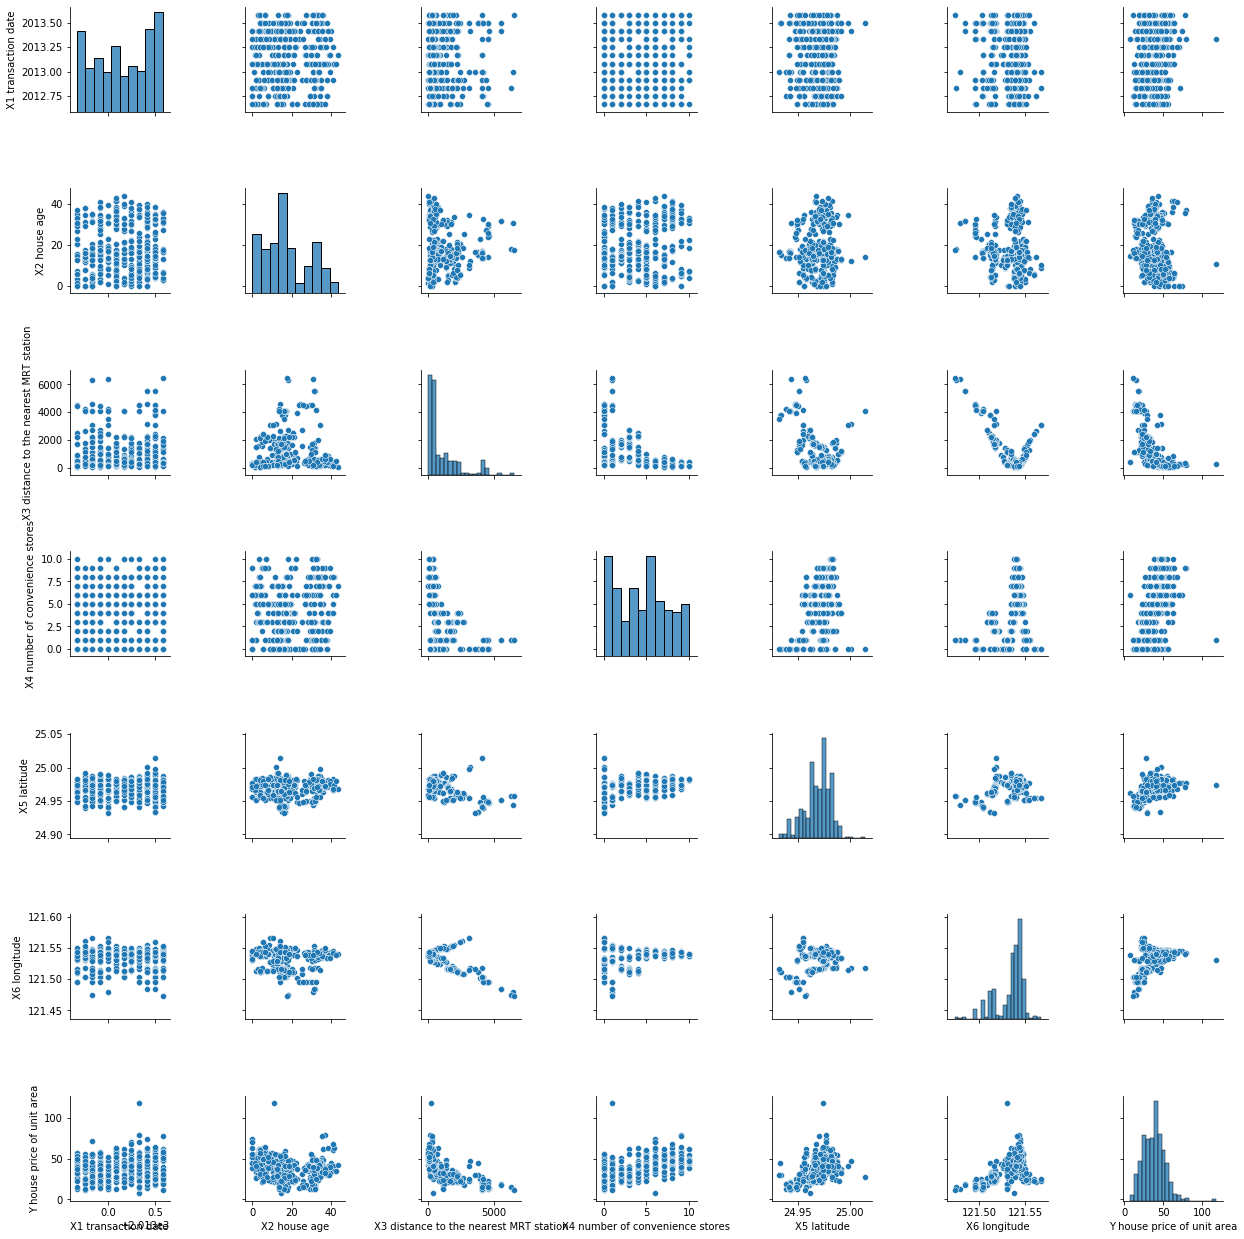

In [8]:
sns.pairplot(df)

#### This pairplot gives the overall looks of the relationships between each variable to another, however, I spotted that there is some outliers in the Y variable where the house price exceed 100. Lets have a deeper look into this

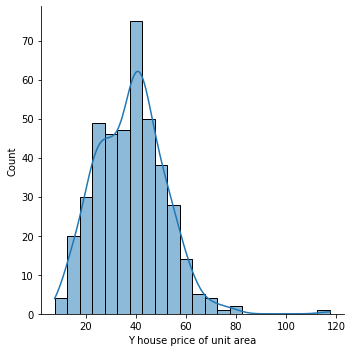

In [9]:
# seaborn displot shows the distribution of the Y variable, very important. 
sns.displot(data=df , x='Y house price of unit area',kde=True)

In [10]:
df.iloc[:,-1].describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: Y house price of unit area, dtype: float64

#### This is the summary statistics of the Y variable, clearly there is outliers where 117 is way greater than the mean+2*sd. Therefore, for the purpose of eliminating the outliers, we will remove this point.


In [11]:
# getting rid of the outlier and get the df again. Now we only have 413 rows, because the outlier is gone. 
df = df[df['Y house price of unit area'] != 117.500000]
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


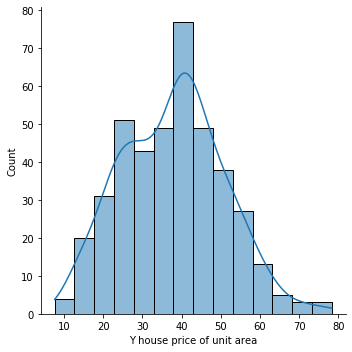

In [12]:
# re-check the distribution, now we are good to go, perfectly normally distributed 
sns.displot(data=df , x='Y house price of unit area',kde=True)

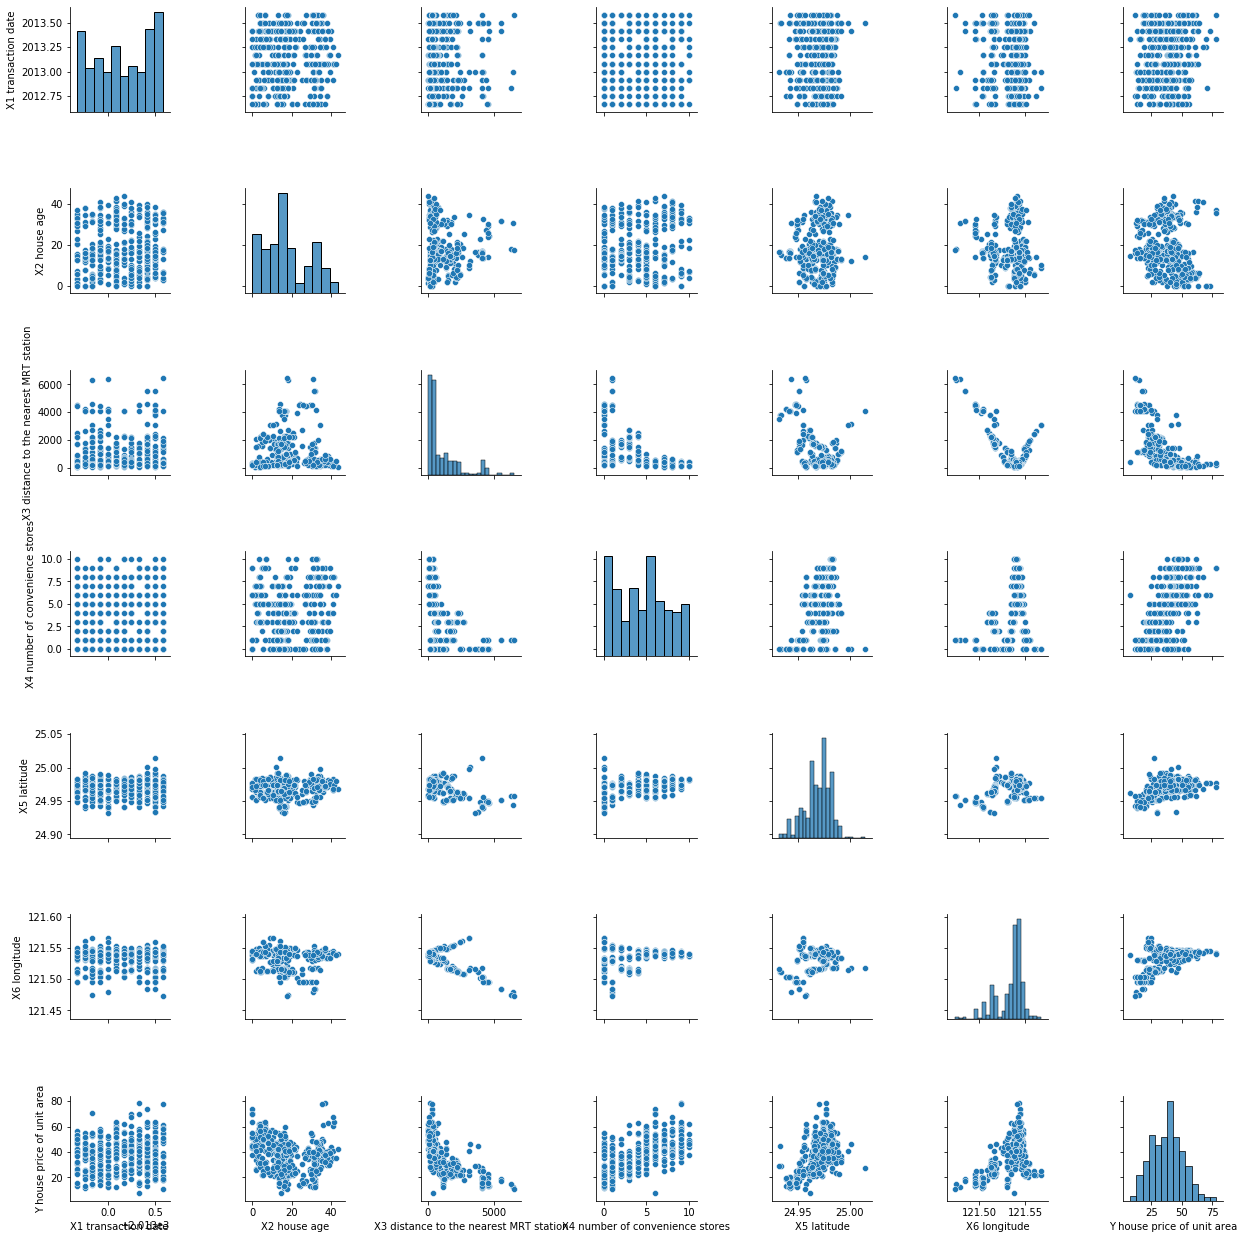

In [13]:
# Now the whole pairplot looks a lot better as well. 
sns.pairplot(df)

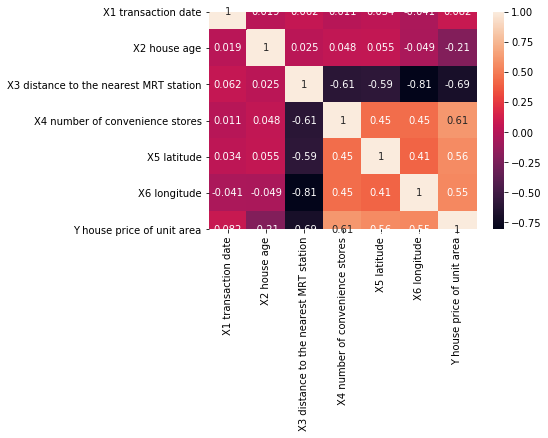

In [14]:
sns.heatmap(df.corr(), annot=True)

#### Last step to check before modeling, checking the correlation coefficients for each of the variables. The conclusion is that there is no very strong relationships between the covariates, so no issue of multi-collinearity. Good to go. 
#### The first impression is that: the number of convenience stores, longitude and latitude might be the best predictors as their correlation coefficient with the Y are the highest.

***

# 4. Modeling:

* Treatment: house characteristics
* Outcome: selling price
* Observed covariates: transaction data and geographical location.

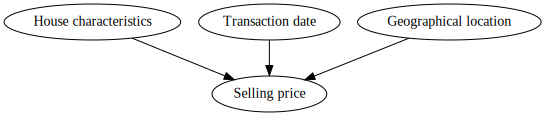

In [15]:
g11 = gr.Digraph()
g11.edge("House characteristics", "Selling price"), g11.edge("Transaction date", "Selling price"), g11.edge("Geographical location", "Selling price")
g11

### 4.1.1 Model 1: Linear regression model

In [16]:
# splitting the dataset into X and Y
X=df.drop('Y house price of unit area',axis=1)
y=df['Y house price of unit area']

In [17]:
# the Xs
X.head(5)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [18]:
# the y 
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

In [19]:
# splitting into training set and testing set 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [20]:
# building the linear regression model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# regression coefficients
pd.DataFrame(model.coef_, X.columns, columns=['Coeficient'])

,Coeficient
X1 transaction date,4.117174
X2 house age,-0.275196
X3 distance to the nearest MRT station,-0.003884
X4 number of convenience stores,1.127974
X5 latitude,262.625658
X6 longitude,23.143147


In [22]:
# this shows the prediction
# y_test is the true label for those entries in the testing set
# y_pred is the values we predicted using the linear regression model
y_pred=model.predict(X_test)
pd.DataFrame({'Test': y_test,'Pred':y_pred }).head(10)

,Test,Pred
176,19.2,13.359524
348,53.7,47.739009
308,53.0,47.237095
300,36.9,45.035895
392,35.3,38.317794
212,31.1,37.997396
104,30.5,35.627931
312,78.0,44.052813
98,51.0,47.237095
198,39.1,39.614498


In [23]:
# This shows the metrics to evaluate whether this linear regression model is good or bad. 
# A typical metric for linear regression is the MAE and mean squared error. 
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE= metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(MSE)
pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,5.861584
MSE,62.661074
RMSE,7.915875


In [24]:
df['Y house price of unit area'].mean()

37.78765133171913

In [25]:
# R squared value
print('The R squared value for this model is ' + str(model.score(X, y)) + ', this means that 62.5% of the variation is explained by the model')

The R squared value for this model is 0.6246788524452268, this means that 62.5% of the variation is explained by the model


In [26]:
# regression summary
# since sklearn can not print out the summary output like this, I fitted another model that is exactly the same as model1. 
X_1 = sm.add_constant(X)
model2 = sm.OLS(y, X_1).fit()
print(model2.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.627
Model:                                    OLS   Adj. R-squared:                  0.621
Method:                         Least Squares   F-statistic:                     113.6
Date:                        Fri, 06 May 2022   Prob (F-statistic):           1.08e-83
Time:                                01:32:50   Log-Likelihood:                -1442.8
No. Observations:                         413   AIC:                             2900.
Df Residuals:                             406   BIC:                             2928.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

/Users/weitianjian/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Conclusion: 
#### Comparing the Y mean 37.78, the MAE of 5.86 and the RMSE of 7.92, this model has an okay amount of error, not very good but also not very bad. As for the R squared value, this linear regression model yields an R squared value of 0.62, it is okay as well. 

<br>

### 4.1.2  Linear regression model - Do not control for the covariates

House characteristics affects the selling price, but transaction data and geographical location also affect its price. In previous section, these covariates are controlled, so we only evaluate the effect of the treatment on outcome and get a precise causal effect estimation.

This section is the analysis on house selling price solely based on house characteristics, without controlling for transaction data and geographical location. 

In [27]:
# dropping covariates
X1=X.drop('X1 transaction date',axis=1)
X1=X1.drop('X5 latitude',axis=1)
X1=X1.drop('X6 longitude',axis=1)
X1.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
0,32.0,84.87882,10
1,19.5,306.59470,9
2,13.3,561.98450,5
3,13.3,561.98450,5
4,5.0,390.56840,5


In [28]:
# splitting into training set and testing set 
X_train1, X_test1, y_train1, y_test1 = train_test_split( X1, y, test_size=0.3, random_state=101)

In [29]:
# building the linear regression model
model1=LinearRegression()
model1.fit(X_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
# regression coefficients
pd.DataFrame(model1.coef_, X1.columns, columns=['Coeficient'])

,Coeficient
X2 house age,-0.260387
X3 distance to the nearest MRT station,-0.005295
X4 number of convenience stores,1.302457


In [31]:
# predictions
y_pred1=model1.predict(X_test1)
pd.DataFrame({'Test': y_test1,'Pred':y_pred1 }).head(10)

,Test,Pred
176,19.2,15.133423
348,53.7,48.213048
308,53.0,43.680958
300,36.9,46.702537
392,35.3,37.317292
212,31.1,31.432091
104,30.5,40.193088
312,78.0,43.788804
98,51.0,43.680958
198,39.1,42.400525


In [32]:
# MAE and RMSE
MAE1= metrics.mean_absolute_error(y_test1, y_pred1)
MSE1= metrics.mean_squared_error(y_test1, y_pred1)
RMSE1=np.sqrt(MSE1)
pd.DataFrame([MAE1, MSE1, RMSE1], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,5.933364
MSE,63.939294
RMSE,7.996205


In [33]:
df['Y house price of unit area'].mean()

37.78765133171913

In [34]:
print('The R squared value for this model is ' + str(model1.score(X1, y)) + ', this means that 58.5% of the variation is explained by the model')

The R squared value for this model is 0.5848568074223548, this means that 58.5% of the variation is explained by the model


In [35]:
# regression summary
X_1 = sm.add_constant(X1)
model21 = sm.OLS(y, X_1).fit()
print(model21.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.586
Model:                                    OLS   Adj. R-squared:                  0.583
Method:                         Least Squares   F-statistic:                     192.9
Date:                        Fri, 06 May 2022   Prob (F-statistic):           6.34e-78
Time:                                01:32:50   Log-Likelihood:                -1464.3
No. Observations:                         413   AIC:                             2937.
Df Residuals:                             409   BIC:                             2953.
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

/Users/weitianjian/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Conclusion: 
#### Since the MAE is 5.93 and the RMSE is 8.00, this model has a greater amount of error than the previous model which controls for the covariates. As for the R squared value, this linear regression model yields an R squared value of 0.58, so it also has a worse fit than the previous model.  

<br>

### 4.2.1  Model 2: Polynomial regression model

In [36]:
X = df.drop(['Y house price of unit area'], axis = 1)
y = df['Y house price of unit area']

In [37]:
train_RMSE_List = []
test_RMSE_List = []

for i in range(1,10):
    #preprocessing
    polynomial_converter = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    #split
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    #train the model
    polymodel = LinearRegression()
    polymodel.fit(X_train, y_train)
    #pdicting on both train and test data
    y_train_pred = polymodel.predict(X_train)
    y_test_pred = polymodel.predict(X_test)
    #evaluation
    train_RMSE = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    test_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    #append
    train_RMSE_List.append(train_RMSE)
    test_RMSE_List.append(test_RMSE)

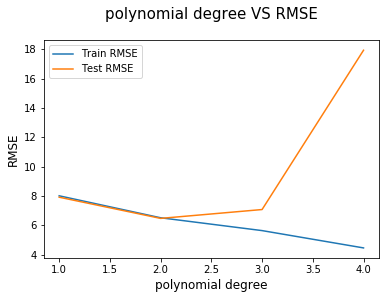

In [38]:
plt.plot(range(1,5), train_RMSE_List[:4], label = 'Train RMSE')
plt.plot(range(1,5), test_RMSE_List[:4], label = 'Test RMSE')

plt.title('polynomial degree VS RMSE', fontsize = 15, y=1.07)
plt.xlabel('polynomial degree', fontsize = 12)
plt.ylabel('RMSE', fontsize = 12)

plt.legend()

#### We can see that the RMSE reach the lowest value when polynomial degree = 2. So we will use the 2 degree polynomial regression model for this analysis. 

In [39]:
#2 Degree
#preprocessing
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)
poly_features = polynomial_converter.fit_transform(X)
#split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
#train the model
polymodel = LinearRegression()
polymodel.fit(X_train, y_train)
#pdicting on both train and test data
y_train_pred = polymodel.predict(X_train)
y_test_pred = polymodel.predict(X_test)
#evaluation
train_RMSE = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
test_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
#appen
train_RMSE_List.append(train_RMSE)
test_RMSE_List.append(test_RMSE)

In [40]:
# prediction
y_pred=polymodel.predict(X_test)
pd.DataFrame({'Test': y_test,'Pred':y_pred }).head(20)

,Test,Pred
176,19.2,16.237137
348,53.7,51.165075
308,53.0,47.760469
300,36.9,49.880652
392,35.3,45.155693
212,31.1,34.416432
104,30.5,35.102890
312,78.0,46.388708
98,51.0,47.760469
198,39.1,42.141448


In [41]:
# MAE and RMSE
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE= metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(MSE)
pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,4.892443
MSE,41.863253
RMSE,6.470182


In [42]:
df['Y house price of unit area'].mean()

37.78765133171913

In [43]:
print('The R squared value for this model is ' + str(polymodel.score(poly_features, y))+ ', this means that 75.1% of the variation is explained by the model')

The R squared value for this model is 0.7511824539716812, this means that 75.1% of the variation is explained by the model


### Conclusion: 
#### Here, the MAE is 4.89, the RMSE is 6.47, and the R squared value is 0.75. This Polynomial regression model is having the lowest error and the best fit so far. 

<br>

### 4.2.2  Polynomial regression model - Do not control for the covariates

In [44]:
#dropping covariates
X1=X.drop('X1 transaction date',axis=1)
X1=X1.drop('X5 latitude',axis=1)
X1=X1.drop('X6 longitude',axis=1)

In [45]:
train_RMSE_List = []
test_RMSE_List = []

for i in range(1,10):
    #preprocessing
    polynomial_converter = PolynomialFeatures(degree=i, include_bias=False)
    poly_features1 = polynomial_converter.fit_transform(X1)
    #split
    X_train1, X_test1, y_train1, y_test1 = train_test_split(poly_features1, y, test_size=0.3, random_state=101)
    #train the model
    polymodel1 = LinearRegression()
    polymodel1.fit(X_train1, y_train1)
    #pdicting on both train and test data
    y_train_pred1 = polymodel1.predict(X_train1)
    y_test_pred1 = polymodel1.predict(X_test1)
    #evaluation
    train_RMSE1 = np.sqrt(metrics.mean_squared_error(y_train1, y_train_pred1))
    test_RMSE1 = np.sqrt(metrics.mean_squared_error(y_test1, y_test_pred1))
    #appen
    train_RMSE_List.append(train_RMSE1)
    test_RMSE_List.append(test_RMSE1)

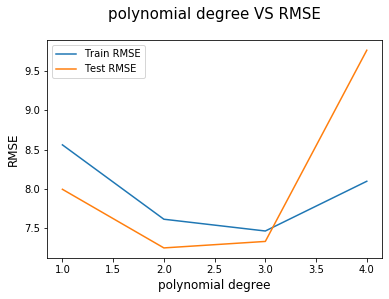

In [46]:
plt.plot(range(1,5), train_RMSE_List[:4], label = 'Train RMSE')
plt.plot(range(1,5), test_RMSE_List[:4], label = 'Test RMSE')

plt.title('polynomial degree VS RMSE', fontsize = 15, y=1.07)
plt.xlabel('polynomial degree', fontsize = 12)
plt.ylabel('RMSE', fontsize = 12)

plt.legend()

#### Same as the previous section, we can see that the RMSE reach the lowest value when polynomial degree = 2. So we will continue to use the 2 degree polynomial regression model for this analysis. 

In [47]:
#preprocessing
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)
poly_features1 = polynomial_converter.fit_transform(X1)
#split
X_train1, X_test1, y_train1, y_test1 = train_test_split(poly_features1, y, test_size=0.3, random_state=101)
#train the model
polymodel1 = LinearRegression()
polymodel1.fit(X_train1, y_train1)
#pdicting on both train and test data
y_train_pred1 = polymodel1.predict(X_train1)
y_test_pred1 = polymodel1.predict(X_test1)
#evaluation
train_RMSE1 = np.sqrt(metrics.mean_squared_error(y_train1, y_train_pred1))
test_RMSE1 = np.sqrt(metrics.mean_squared_error(y_test1, y_test_pred1))
#appen
train_RMSE_List.append(train_RMSE1)
test_RMSE_List.append(test_RMSE1)

In [48]:
# prediction
y_pred1=polymodel1.predict(X_test1)
pd.DataFrame({'Test': y_test1,'Pred':y_pred1 }).head(20)

,Test,Pred
176,19.2,18.907970
348,53.7,52.098794
308,53.0,43.303729
300,36.9,53.763043
392,35.3,44.571528
212,31.1,26.528986
104,30.5,41.025393
312,78.0,43.058194
98,51.0,43.303729
198,39.1,44.979266


In [49]:
# MAE and RMSE
MAE1= metrics.mean_absolute_error(y_test1, y_pred1)
MSE1= metrics.mean_squared_error(y_test1, y_pred1)
RMSE1=np.sqrt(MSE1)
pd.DataFrame([MAE1, MSE1, RMSE1], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,5.290498
MSE,52.573747
RMSE,7.250776


In [50]:
print('The R squared value for this model is ' + str(polymodel1.score(poly_features1, y))+ ', this means that 66.8% of the variation is explained by the model')

The R squared value for this model is 0.6680046609562089, this means that 66.8% of the variation is explained by the model


### Conclusion: 
#### When we do not control for the covariates, the polynomial regression model has a MAE of 5.29 and the RMSE of 7.25. As for the R squared value, this model yields an R squared value of 0.67. These show that, when the covariates are not controlled, the model has a greater error and a worse fit. 

<br>

### 4.3.1 Model 3: KNN

In [51]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

In [52]:
X=df.drop('Y house price of unit area',axis=1)
y=df['Y house price of unit area']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [53]:
# Find optimal K
ks = [1, 2, 5, 10 , 15, 30]
knn_test_RMSE = []
for k in ks:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    test_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    knn_test_RMSE.append(test_RMSE)

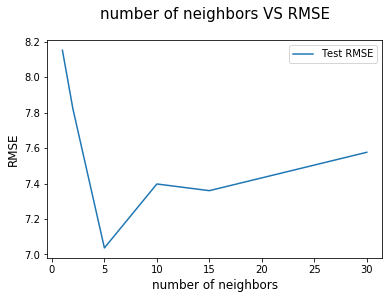

In [54]:
plt.plot(ks, knn_test_RMSE, label = 'Test RMSE')
plt.title('number of neighbors VS RMSE', fontsize = 15, y=1.07)
plt.xlabel('number of neighbors', fontsize = 12)
plt.ylabel('RMSE', fontsize = 12)

plt.legend()

#### Here, we can see that the RMSE reach the lowest value when number of neighbors is 5. So we will use the KNN model with K=5.

In [55]:
# K=5:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)

In [56]:
MAE= metrics.mean_absolute_error(y_test, y_preds)
MSE= metrics.mean_squared_error(y_test, y_preds)
RMSE=np.sqrt(MSE)
pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,5.270806
MSE,49.520326
RMSE,7.037068


In [57]:
print('The R squared value for this model is ' + str(knn.score(X, y))+ ', this means that 74.1% of the variation is explained by the model')

The R squared value for this model is 0.7405996495491649, this means that 74.1% of the variation is explained by the model


### Conclusion: 
#### For the KNN model, the MAE is 5.27 and the RMSE is 7.04. It has a fair amount of error, which is smaller than the linear regression model but higher than the polynomial regression model. The R squared value is 0.74, which is also the middle of the three but only slightly smaller than that of the polynomial model. 

<br>

### 4.3.2 Model 3: KNN - Do not control for the covariates

In [58]:
X1=X.drop('X1 transaction date',axis=1)
X1=X1.drop('X5 latitude',axis=1)
X1=X1.drop('X6 longitude',axis=1)

In [59]:
X_train1, X_test1, y_train1, y_test1 = train_test_split( X1, y, test_size=0.3, random_state=101)

In [60]:
# Find optimal K
ks = [1, 2, 5, 10 , 15, 30]
knn_test_RMSE1 = []
for k in ks:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train1, y_train1)
    y_test_pred1 = knn.predict(X_test1)
    test_RMSE1 = np.sqrt(metrics.mean_squared_error(y_test1, y_test_pred1))
    knn_test_RMSE1.append(test_RMSE1)

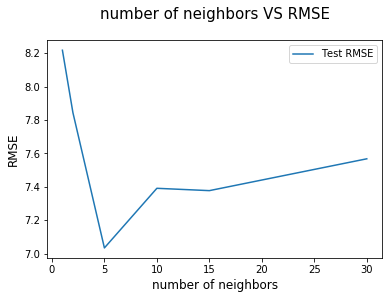

In [61]:
plt.plot(ks, knn_test_RMSE1, label = 'Test RMSE')
plt.title('number of neighbors VS RMSE', fontsize = 15, y=1.07)
plt.xlabel('number of neighbors', fontsize = 12)
plt.ylabel('RMSE', fontsize = 12)

plt.legend()

#### We will continue to use K=5 since the RMSE is the lowest. 

In [62]:
# Use K=5:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train1, y_train1)
y_preds1 = knn.predict(X_test1)

In [63]:
MAE1= metrics.mean_absolute_error(y_test1, y_preds1)
MSE1= metrics.mean_squared_error(y_test1, y_preds1)
RMSE1=np.sqrt(MSE1)
pd.DataFrame([MAE1, MSE1, RMSE1], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,5.259194
MSE,49.476087
RMSE,7.033924


In [64]:
print('The R squared value for this model is ' + str(knn.score(X1, y))+ ', this means that 74.2% of the variation is explained by the model')

The R squared value for this model is 0.7417662851532354, this means that 74.2% of the variation is explained by the model


### Conclusion: 
#### When we do not control for the covariates, the KNN  model has a MAE of 5.26 and the RMSE of 7.03. As for the R squared value, this model yields an R squared value of 0.74. These show that, when the covariates are not controlled, the model has a greater error and a worse fit. 

<br>

***

# 5. Findings:

#### Linear regression model：
    1. Full Model: 
        MAE: 5.86; RMSE: 7.92; R-squared: 0.63
    2. Do not control for the covariates:
        MAE: 5.93; RMSE: 8.00; R-squared: 0.58
        

#### Polynomial regression model (2 degree): 
    1. Full Model:
        MAE: 4.89; RMSE: 6.47; R-squared: 0.75
    2. Do not control for the covariates:
        MAE: 5.29; RMSE: 7.25; R-squared: 0.67
  
        
#### KNN (k=5):
    1. Full Model:
        MAE: 5.27; RMSE: 7.04; R-squared: 0.74
    2. Do not control for the covariates:
        MAE: 5.26; RMSE: 7.03   R-squared: 0.74

#### Controlling for covariates：

First of all, all three models were evaluated with and without the control for covariates. In this study, the treatment is the house characteristic, the outcome is the house selling price, and the covariates are transaction date and geographical location. According to the results, although not very obvious, we can see that the linear regression model and polynomial regression model have better performance when the covariates are taken into account. In other words, these two models tend to have lower error and better model fit when the transaction date and geographical location are controlled. On the other hand, controlling for covariates does not significantly affect the KNN model. One possibility for this problem is that the dataset is not big enough. We find that the entire study area is just a few districts around Taibei (a city in Taiwan, China), and the time period is one year (From June 2012 to May 2013). Therefore, the response variable might not have significant variations under these two covariates. Nevertheless, we believe that if the dataset is big enough, the model will always benefit from controlling for the covariates. As a result, we will only compare the full models (with covariates controlled) in the following sections.


#### Linear regression model：

Overall, the linear regression model does not seem to work great compared to the polynomial regression and KNN models. The MAE is 5.86, RMSE is 7.92, and the R-squared value is 0.63, which shows that it has the largest error and worse fit among the three models. Since the housing price prediction is complicated, this low performance is expected as the linear regression model might be over-simplified, and we expect the more advanced models to work better for our study. 
One thing to notice here is that the R-squared value is only the R-squared for the training set. We do not want the training set to be overfitted and achieve a super high R-squared value for the training set; if so, that would probably yield a poor prediction result in the testing set. It is like a tradeoff, so we want something in the middle. 

#### Polynomial regression model: 
As for the polynomial regression model, there is one row of data that the y_pred is very strange, reaching 40993. This is probably because the polynomial degree was too high when doing this prediction, as mentioned in the Polynomial Degree vs. RMSE graph. This graph suggests that when the polynomial degree exceeds 2, the RMSE would take off for the testing set. It seems like the polynomial model can learn the training set very well as the blue line is very flat and smooth and close to 0, which is very good. According to the evaluation, when using the polynomial degree of 2, the result is decent as the MAE and RMSE are not very far from the actual mean, and the R-squared value is 75%. The model performance is also the highest among the three. In the end, it is fair to say that the polynomial regression model did its job!

#### KNN：

The KNN model is an simple machine learning model. Here, according to the number of neighbors vs. RMSE graph, the k is selected to be 5. The result shows that it has a fair performance. It works better than the simple linear regression model but not as good as the polynomial regression model. Besides, although its concept is relatively straightforward and intuitive, the KNN model has a large computation and runtime cost compared to the linear regression and polynomial regression models. As a result, the polynomial regression model still out-perform the other two models. 

***

# 6. Conclusions: 

In conclusion, this study tries to predict the houses selling price using the linear regression, polynomial regression, and KNN models. By comparing the results with the three models and model specifications, we find out that the polynomial regression model is most suitable to predict housing prices for our dataset; and controlling for covariates is always preferred. Again, although these are not super accurate models that can be generalized in any case, the model evaluating process helps us through this type of problem in the future.


From this project, we have learned the entire data and model evaluating process, from finding the data, downloading, importing, doing EDAs, modeling, and getting conclusions. We also had the opportunity to try out a couple of models that we think would work. In the end, all of them seemed to work, with the polynomial regression being the temporary winner. We think that we can now answer the predictive question we brought up in the introduction with confidence. We are able to predict the house price very naively by using the features mentioned above. But that is meaningful to us.

#### My plan in the future: 

In the future, we wish we can have the chance to use a much larger dataset with much more features to learn the models. Maybe under the help of some advanced machine learning models, we are able to come up with a better model with better MSE to answer the question! 